Linear Regression Between Eating Lifestyle and COVID 19 Deaths

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

from pandas import Series, DataFrame
from pylab import rcParams

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics  import confusion_matrix
from sklearn.metrics  import precision_score,recall_score

In [257]:
## %matplotlib inline
## rcParams['figure.figsize'] = 32,60
## sb.set_style('whitegrid')

In [258]:
address = 'C:/Users/Jared Guest/Documents/Udacity_Resources/Food_Data.csv' 
cols =[0,3,4,6,7,9,11,12,13,14,15,18,19,20,17,23,24,31,30,29,28,26,25]

Dropping Columns 

In [259]:
df = pd.read_csv(address,index_col=None)
df.drop(df.columns[cols],axis=1,inplace=True)
df

,Alcoholic Beverages,Animal Products,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Starchy Roots,Vegetal Products,Vegetable Oils,Deaths
0,0.0000,4.7774,37.1186,1.4757,2.4512,0.3252,45.2476,2.3012,0.000347
1,0.9120,16.0930,16.2107,3.8982,9.9441,1.2651,33.9070,2.8244,0.001085
2,0.0896,6.0326,25.0112,3.1805,3.9869,1.9262,43.9749,5.7638,0.001203
3,1.9388,4.6927,18.3521,2.3133,0.5067,12.6239,45.3184,4.2741,0.000006
4,2.3041,15.3672,13.7215,3.6824,4.6904,0.8434,34.6225,4.6904,0.003093
...,...,...,...,...,...,...,...,...,...
165,0.8454,7.2303,21.3126,2.3804,2.6474,1.3571,42.7586,7.5417,0.000035
166,0.7150,10.9806,26.9833,1.8046,0.5618,0.7150,39.0364,1.3279,0.000000
167,0.0000,3.4667,32.0727,1.1879,0.6545,0.3152,46.5455,3.9515,0.000041
168,1.1925,3.3043,31.5528,0.2236,0.5217,4.0994,46.7081,3.0062,0.000039


In [260]:
df.head()

,Alcoholic Beverages,Animal Products,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Starchy Roots,Vegetal Products,Vegetable Oils,Deaths
0,0.0000,4.7774,37.1186,1.4757,2.4512,0.3252,45.2476,2.3012,0.000347
1,0.9120,16.0930,16.2107,3.8982,9.9441,1.2651,33.9070,2.8244,0.001085
2,0.0896,6.0326,25.0112,3.1805,3.9869,1.9262,43.9749,5.7638,0.001203
3,1.9388,4.6927,18.3521,2.3133,0.5067,12.6239,45.3184,4.2741,0.000006
4,2.3041,15.3672,13.7215,3.6824,4.6904,0.8434,34.6225,4.6904,0.003093


Filtering Out Missing Values 

How many Nans do we have?

In [261]:
dp=df.isnull().sum().sum()
dp


9

Using Linear Regression to Fill Forward Nans

In [262]:
df=df.interpolate(method ='linear', limit_direction ='forward')
df

,Alcoholic Beverages,Animal Products,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Starchy Roots,Vegetal Products,Vegetable Oils,Deaths
0,0.0000,4.7774,37.1186,1.4757,2.4512,0.3252,45.2476,2.3012,0.000347
1,0.9120,16.0930,16.2107,3.8982,9.9441,1.2651,33.9070,2.8244,0.001085
2,0.0896,6.0326,25.0112,3.1805,3.9869,1.9262,43.9749,5.7638,0.001203
3,1.9388,4.6927,18.3521,2.3133,0.5067,12.6239,45.3184,4.2741,0.000006
4,2.3041,15.3672,13.7215,3.6824,4.6904,0.8434,34.6225,4.6904,0.003093
...,...,...,...,...,...,...,...,...,...
165,0.8454,7.2303,21.3126,2.3804,2.6474,1.3571,42.7586,7.5417,0.000035
166,0.7150,10.9806,26.9833,1.8046,0.5618,0.7150,39.0364,1.3279,0.000000
167,0.0000,3.4667,32.0727,1.1879,0.6545,0.3152,46.5455,3.9515,0.000041
168,1.1925,3.3043,31.5528,0.2236,0.5217,4.0994,46.7081,3.0062,0.000039


Dropping Columns with Nans

In [263]:
df.dropna(axis=0)
df


,Alcoholic Beverages,Animal Products,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Starchy Roots,Vegetal Products,Vegetable Oils,Deaths
0,0.0000,4.7774,37.1186,1.4757,2.4512,0.3252,45.2476,2.3012,0.000347
1,0.9120,16.0930,16.2107,3.8982,9.9441,1.2651,33.9070,2.8244,0.001085
2,0.0896,6.0326,25.0112,3.1805,3.9869,1.9262,43.9749,5.7638,0.001203
3,1.9388,4.6927,18.3521,2.3133,0.5067,12.6239,45.3184,4.2741,0.000006
4,2.3041,15.3672,13.7215,3.6824,4.6904,0.8434,34.6225,4.6904,0.003093
...,...,...,...,...,...,...,...,...,...
165,0.8454,7.2303,21.3126,2.3804,2.6474,1.3571,42.7586,7.5417,0.000035
166,0.7150,10.9806,26.9833,1.8046,0.5618,0.7150,39.0364,1.3279,0.000000
167,0.0000,3.4667,32.0727,1.1879,0.6545,0.3152,46.5455,3.9515,0.000041
168,1.1925,3.3043,31.5528,0.2236,0.5217,4.0994,46.7081,3.0062,0.000039


Looking for Correlations among Variables 

In [264]:
df

,Alcoholic Beverages,Animal Products,Cereals - Excluding Beer,Fruits - Excluding Wine,Milk - Excluding Butter,Starchy Roots,Vegetal Products,Vegetable Oils,Deaths
0,0.0000,4.7774,37.1186,1.4757,2.4512,0.3252,45.2476,2.3012,0.000347
1,0.9120,16.0930,16.2107,3.8982,9.9441,1.2651,33.9070,2.8244,0.001085
2,0.0896,6.0326,25.0112,3.1805,3.9869,1.9262,43.9749,5.7638,0.001203
3,1.9388,4.6927,18.3521,2.3133,0.5067,12.6239,45.3184,4.2741,0.000006
4,2.3041,15.3672,13.7215,3.6824,4.6904,0.8434,34.6225,4.6904,0.003093
...,...,...,...,...,...,...,...,...,...
165,0.8454,7.2303,21.3126,2.3804,2.6474,1.3571,42.7586,7.5417,0.000035
166,0.7150,10.9806,26.9833,1.8046,0.5618,0.7150,39.0364,1.3279,0.000000
167,0.0000,3.4667,32.0727,1.1879,0.6545,0.3152,46.5455,3.9515,0.000041
168,1.1925,3.3043,31.5528,0.2236,0.5217,4.0994,46.7081,3.0062,0.000039


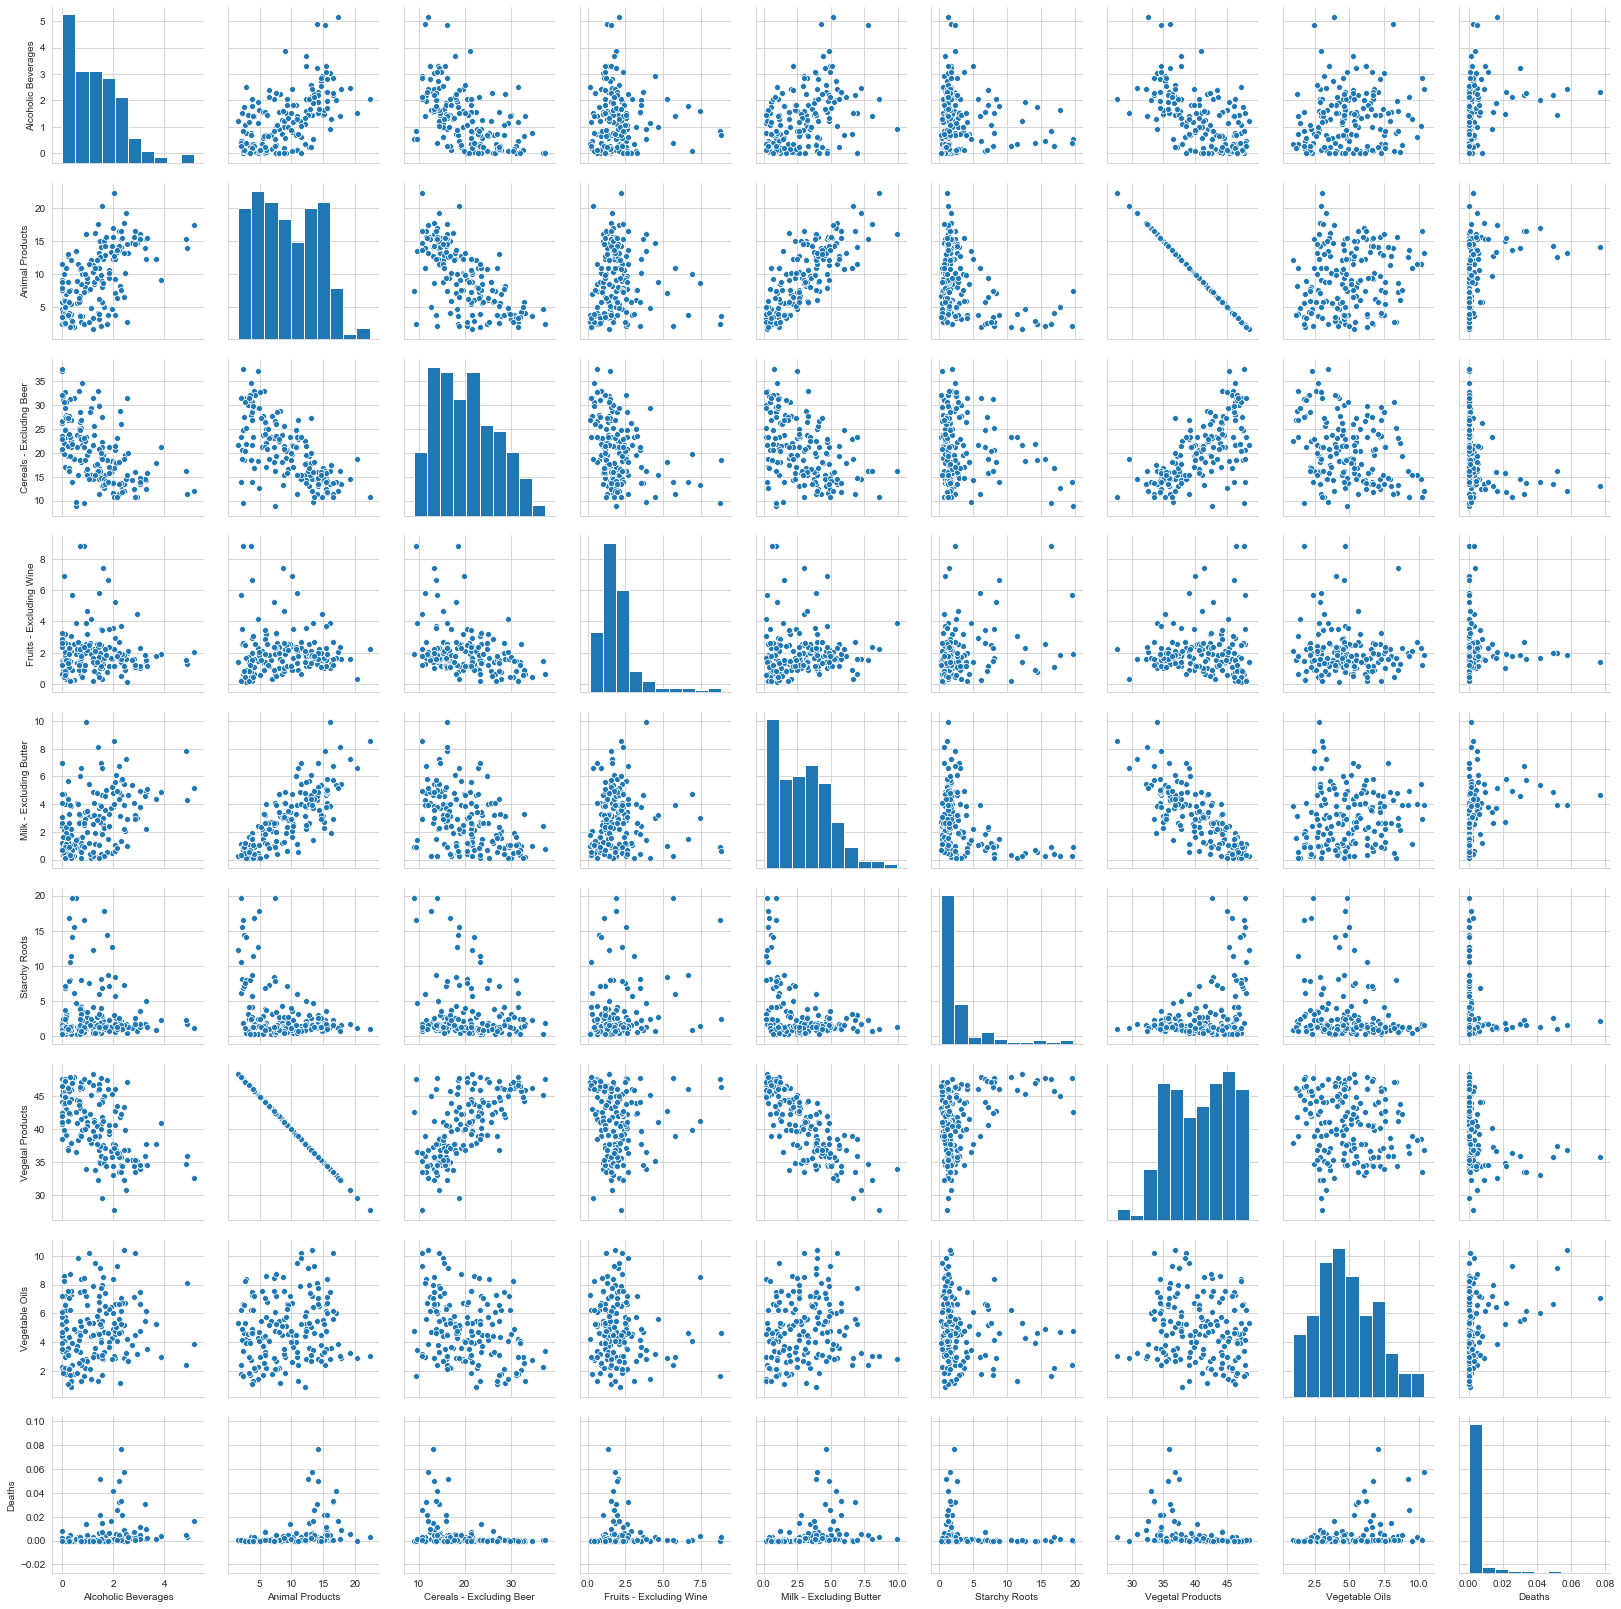

In [265]:
sb.pairplot(df)

Checking coorlations among variables 

In [266]:
print(df.corr())

                          Alcoholic Beverages  Animal Products  \
Alcoholic Beverages                  1.000000         0.588293   
Animal Products                      0.588293         1.000000   
Cereals - Excluding Beer            -0.550811        -0.677951   
Fruits - Excluding Wine             -0.028713        -0.037809   
Milk - Excluding Butter              0.404325         0.787617   
Starchy Roots                       -0.106954        -0.424957   
Vegetal Products                    -0.588213        -0.999997   
Vegetable Oils                       0.115204         0.149794   
Deaths                               0.293213         0.362325   

                          Cereals - Excluding Beer  Fruits - Excluding Wine  \
Alcoholic Beverages                      -0.550811                -0.028713   
Animal Products                          -0.677951                -0.037809   
Cereals - Excluding Beer                  1.000000                -0.346149   
Fruits - Excluding Wine

Since the author of the Linear Regression Analysis is stupid, he did not realize that animal products% and vegetable products% would be correlated.  As you eat more vegetables your vegetable percentage goes up and your meat comsumption goes down.  Therefore, I will conduct two simple regression between vegetable products and deaths and meat eating and deaths.

Moreover, I discovered that vegetable products and milk were link -0.78 and other interesting correlations.

In [285]:
Foods1 = df[['Alcoholic Beverages','Animal Products','Cereals - Excluding Beer',]].values

COVID_DEATHS = df[['Deaths']].values

Foods1_names = ['Alcoholic Beverages','Animal Products','Cereals - Excluding Beer']

X, y = scale(df), COVID_DEATHS

The R^2 is equal to 1 so there is something wrong with the regression.  So the model does not work.

In [286]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

1.0
